# Operating on Presburger Sets

In [13]:
import islpy as isl
import islplot.plotter as iplt
import matplotlib.pyplot as plt

## Simple sets

In [28]:
def plot_set(s, shape=True):
    if shape:
        iplt.plot_set_shapes(s, color="blue")

    iplt.plot_set_points(s, color="orange")
    plt.xlabel("i")
    plt.ylabel("j")
    plt.gca().set_aspect("equal")
    plt.grid()

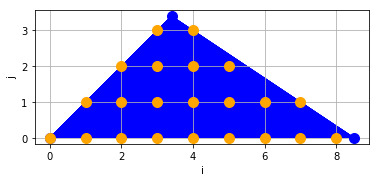

In [29]:
s = isl.Set("{[i,j]: 2*i + 3*j <= 17 and i - j >= 0 and j >= 0}")

plot_set(s)

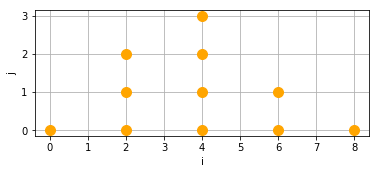

In [30]:
s = isl.Set("{[i,j]: 2*i + 3*j <= 17 and i - j >= 0 and j >= 0 and i mod 2 =0}")

plot_set(s, shape=False)

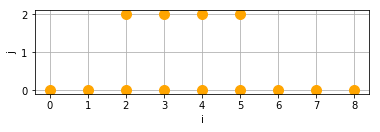

In [34]:
s = isl.Set("{[i,j]: 2*i + 3*j <= 17 and i - j >= 0 and j >= 0 and exists k: 2*k=j}")

plot_set(s, shape=False)

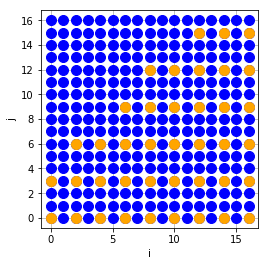

In [47]:
s0 = isl.Set("{[i,j]: 0<=i,j<17}")
iplt.plot_set_points(s0, color="blue")

s = s0 & isl.Set("{[i,j]: exists l: 3*i+2*j=6*l and j<5+i}")
plot_set(s, shape=False)

## Going Parametric

In [76]:
s = isl.Set("[n] -> {[i,j]: 0<=i,j<17}")
print(s)

[n] -> { [i, j] : 0 <= i <= 16 and 0 <= j <= 16 }


Note:

- Just adds a dimension (that's labeled as a parameter)
- All operations shown here just keep working
- (But: hard to plot)

## Representing Maps

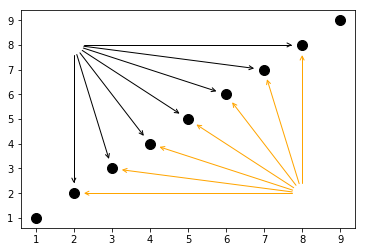

In [99]:
iplt.plot_set_points(isl.Set("{[x,y]: 0 < x = y <= 9}"))
m1 = isl.Map("{[2,8] -> [x,y]: 1 < x = y < 9}")
m2 = isl.Map("{[8,2] -> [x,y]: 1 < x = y < 9}")
iplt.plot_map(m1)
#iplt.plot_map(m1.reverse())
iplt.plot_map(m2, color="orange")
#iplt.plot_set_points(m1.domain())
#iplt.plot_set_points(m1.range(), color="blue")

# iplt.plot_map(m1.apply_range(m2.reverse()))

Note:

- Just adds a dimension (that's labeled as an input)
- Can also be parametric

## Set Operations

Set("{ [i] : (i) mod 2 = 0 and 0 <= i <= 16 }")

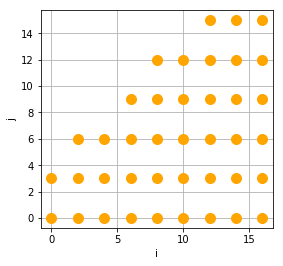

In [103]:
s0 = isl.Set("{[i,j]: 0<=i,j<17}")
s = s0 & isl.Set("{[i,j]: exists l: 3*i+2*j=6*l and j<5+i}")
plot_set(s, shape=False)

s.project_out(isl.dim_type.out, 1, 1)

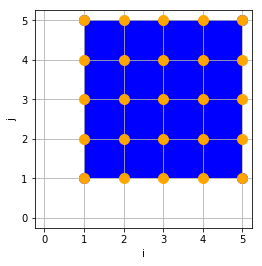

In [100]:
s1 = isl.Set("{ [x, y] : x >= 1 and x <= 5 and y >= 1 and y <= 5 }")
plot_set(s1)

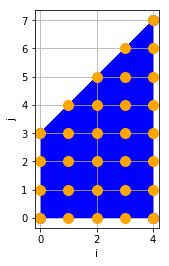

In [57]:
s2 = isl.Set("{ [x, y] : x >= 0 and x <= 4 and y >= 0 and y <= 3 + x }")
plot_set(s2)

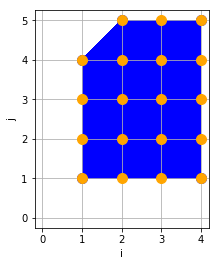

In [58]:
plot_set(s1 & s2)

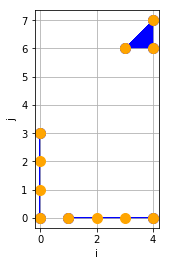

In [60]:
plot_set(s2 & s1.complement())

PwAff("{ [(15)] }")

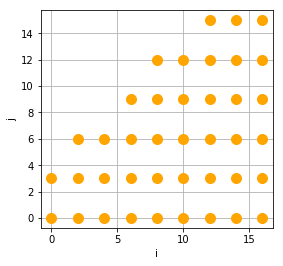

In [65]:
s0 = isl.Set("{[i,j]: 0<=i,j<17}")
s = s0 & isl.Set("{[i,j]: exists l: 3*i+2*j=6*l and j<5+i}")

plot_set(s, shape=False)
s.dim_max(1)

In [70]:
sp = s.move_dims(isl.dim_type.param, 0, isl.dim_type.out, 0, 1)
print(sp)
sp.dim_max(0)

[i] -> { [j] : (i) mod 2 = 0 and (j) mod 3 = 0 and 0 <= i <= 16 and 0 <= j <= 16 and j <= 4 + i }


PwAff("[i] -> { [(3 + 3*floor((1 + 2*floor((i)/2))/3))] : (i) mod 2 = 0 and 0 <= i <= 11 and -2 - i <= 6*floor((2 - i)/6) <= 3 - i; [(15)] : (i) mod 2 = 0 and 12 <= i <= 16 }")

*Note:*
    
- Result is piecewise quasi-affine expression, allows `pwaff1.le_set(pwaff2)`

{ S[x = 7, y = -3] }


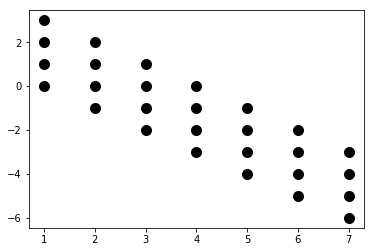

In [75]:
s = isl.Set("{S[x,y]: 0 < x < 8 and 0 < y + x < 5}")

print(s.lexmax())
iplt.plot_set_points(s)

## Other things to try

- Explore the data structure
- Emptiness checks, subset queries
- `gist`
- Convex hull
- Coalescing